In [1]:
import pandas as pd
import os

In [2]:
# Extract csv files from the unzipped file
csv_files = []
for filename in os.listdir("C:\\Users\\Miguel António\\Desktop\\PORTFOLIO\\f1_predicts\\archive"):
    if filename.endswith('.csv'):
        csv_files.append(os.path.join("C:\\Users\\Miguel António\\Desktop\\PORTFOLIO\\f1_predicts\\archive", filename))


csv_files

FileNotFoundError: [WinError 3] O sistema não conseguiu localizar o caminho especificado: 'C:\\Users\\Miguel António\\Desktop\\PORTFOLIO\\f1_predicts\\archive'

In [ ]:
circuits = pd.read_csv("C:\\Users\\Miguel António\\Desktop\\PORTFOLIO\\f1_predicts\\archive\\circuits.csv")
drivers = pd.read_csv("C:\\Users\\Miguel António\\Desktop\\PORTFOLIO\\f1_predicts\\archive\\drivers.csv")
constructor_results = pd.read_csv("C:\\Users\\Miguel António\\Desktop\\PORTFOLIO\\f1_predicts\\archive\\constructor_results.csv")
constructor_standings = pd.read_csv("C:\\Users\\Miguel António\\Desktop\\PORTFOLIO\\f1_predicts\\archive\\constructor_standings.csv")
constructors = pd.read_csv("C:\\Users\\Miguel António\\Desktop\\PORTFOLIO\\f1_predicts\\archive\\constructors.csv")
lap_times = pd.read_csv("C:\\Users\\Miguel António\\Desktop\\PORTFOLIO\\f1_predicts\\archive\\lap_times.csv")
pit_stops = pd.read_csv("C:\\Users\\Miguel António\\Desktop\\PORTFOLIO\\f1_predicts\\archive\\pit_stops.csv")
qualifying = pd.read_csv("C:\\Users\\Miguel António\\Desktop\\PORTFOLIO\\f1_predicts\\archive\\qualifying.csv")
races = pd.read_csv("C:\\Users\\Miguel António\\Desktop\\PORTFOLIO\\f1_predicts\\archive\\races.csv")
results = pd.read_csv("C:\\Users\\Miguel António\\Desktop\\PORTFOLIO\\f1_predicts\\archive\\results.csv")
status = pd.read_csv("C:\\Users\\Miguel António\\Desktop\\PORTFOLIO\\f1_predicts\\archive\\status.csv") 
sprint_results = pd.read_csv("C:\\Users\\Miguel António\\Desktop\\PORTFOLIO\\f1_predicts\\archive\\sprint_results.csv")
driver_standings = pd.read_csv("C:\\Users\\Miguel António\\Desktop\\PORTFOLIO\\f1_predicts\\archive\\driver_standings.csv")
seasons = pd.read_csv("C:\\Users\\Miguel António\\Desktop\\PORTFOLIO\\f1_predicts\\archive\\seasons.csv")

In [ ]:
dataframes = {
    "circuits": circuits,
    "drivers": drivers,
    "driver_standings": driver_standings,
    "constructor_results": constructor_results,
    "constructor_standings": constructor_standings,
    "constructors": constructors,
    "lap_times": lap_times,
    "pit_stops": pit_stops,
    "qualifying": qualifying,
    "races": races,
    "results": results,
    "status": status,
    "sprint_results": sprint_results,
    "seasons": seasons}

In [ ]:
for elem in dataframes:
    print(f"{elem} has {dataframes[elem].shape[0]} rows and {dataframes[elem].shape[1]} columns {dataframes[elem].nunique()} unique values")
    print("\n")

circuits has 77 rows and 9 columns circuitId     77
circuitRef    77
name          77
location      75
country       35
lat           77
lng           77
alt           66
url           77
dtype: int64 unique values


drivers has 861 rows and 9 columns driverId       861
driverRef      861
number          49
code            98
forename       478
surname        802
dob            843
nationality     43
url            861
dtype: int64 unique values


driver_standings has 34863 rows and 7 columns driverStandingsId    34863
raceId                1125
driverId               854
points                 442
position               108
positionText           109
wins                    20
dtype: int64 unique values


constructor_results has 12625 rows and 5 columns constructorResultsId    12625
raceId                   1060
constructorId             175
points                     61
status                      2
dtype: int64 unique values


constructor_standings has 13391 rows and 7 columns const

---
- **EDA**
---

- Circuits

In [ ]:
circuits.columns

Index(['circuitId', 'circuitRef', 'name', 'location', 'country', 'lat', 'lng',
       'alt', 'url'],
      dtype='object')

- Condições geográficas das pistas

In [ ]:
import plotly.express as px

fig = px.bar(
    circuits.sort_values(by='alt',ascending=False),
    x='name',
    y='alt',
    title='Altitude por Circuit ID',
    labels={'circuitId': 'Circuit ID', 'alt': 'Altitude (m)'},
    color_discrete_sequence=['#cdba1a']
)

fig.update_layout(
    xaxis_tickangle=-45,
    template='plotly_white'
)

fig.show()


fig = px.bar(
    circuits.sort_values(by='lat',ascending=False),
    x='name',
    y='lat',
    title='Latitude por Circuit ID',
    labels={'circuitId': 'Circuit ID', 'lat': 'Lat (º)'},
    color_discrete_sequence=['#bacd1a']
)

fig.update_layout(
    xaxis_tickangle=-45,
    template='plotly_white'
)

fig.show()



fig = px.bar(
    circuits.sort_values(by='lng',ascending=False),
    x='name',
    y='lng',
    title='Longitude por Circuit ID',
    labels={'circuitId': 'Circuit ID', 'lng': 'Lng (º)'},
    color_discrete_sequence=['#84cd1a']
)

fig.update_layout(
    xaxis_tickangle=-45,
    template='plotly_white'
)

fig.show()

In [ ]:
import plotly.express as px

fig = px.scatter_geo(
    circuits,
    lat='lat',
    lon='lng',
    hover_name='name',
    hover_data=['country', 'alt'],
    color='alt',
    color_continuous_scale='Viridis',
    size_max=15,
    title='Altitude dos Circuitos pelo Mundo'
)

fig.update_layout(
    geo=dict(
        scope='world',
        projection_type='natural earth',
        showland=True,
        landcolor='rgb(217, 217, 217)',
        showcountries=True,
        countrycolor='lightgray'
    ),
    template='plotly_white',
    height=800, 
    margin=dict(l=0, r=0, t=50, b=0)  
)

fig.show()



#==============================================================================================================

import plotly.graph_objects as go

grouped = circuits.groupby('country').agg({
    'lat': 'mean',
    'lng': 'mean',
    'alt': 'mean'
}).reset_index()

choropleth = go.Choropleth(
    locations=grouped['country'],
    locationmode='country names',
    z=grouped['alt'],
    colorscale='Viridis',
    colorbar_title='Altitude média (m)',
    showscale=True
)

scatter = go.Scattergeo(
    lon=circuits['lng'],
    lat=circuits['lat'],
    text=circuits['name'] + '<br>Altitude: ' + circuits['alt'].astype(str) + ' m',
    mode='markers',
    marker=dict(size=6, color='black'),
    name='Circuitos'
)

layout = go.Layout(
    title='Altitude Média por País + Localização dos Circuitos',
    geo=dict(
        showland=True,
        landcolor='rgb(230, 230, 230)',
        showcountries=True,
        projection_type='natural earth'
    ),
    height=800,
    template='plotly_white'
)

fig = go.Figure(data=[choropleth, scatter], layout=layout)
fig.show()

In [ ]:
circuits.columns

Index(['circuitId', 'circuitRef', 'name', 'location', 'country', 'lat', 'lng',
       'alt', 'url'],
      dtype='object')

In [ ]:
races.columns

Index(['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time', 'url',
       'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time',
       'quali_date', 'quali_time', 'sprint_date', 'sprint_time'],
      dtype='object')

In [ ]:
results.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId'],
      dtype='object')

- Pilots with the most wins per circuit

In [ ]:
vitorias = results[results['positionOrder'] == 1]

vitorias = vitorias.merge(races[['raceId', 'circuitId']], on='raceId', how='left')

contagem = vitorias.groupby(['circuitId', 'driverId']).size().reset_index(name='vitorias')

top_vitoriosos = contagem.sort_values('vitorias', ascending=False).drop_duplicates('circuitId')

top_vitoriosos = top_vitoriosos.merge(circuits[['circuitId', 'name']], on='circuitId', how='left')

top_vitoriosos = top_vitoriosos.merge(drivers[['driverId', 'forename', 'surname']], on='driverId', how='left')

top_vitoriosos['piloto'] = top_vitoriosos['forename'] + ' ' + top_vitoriosos['surname']

fig = px.bar(
    top_vitoriosos,
    x='name',
    y='vitorias',
    color='piloto',
    title='Pilotos Mais Vitoriosos por Circuito',
    labels={'name': 'Circuito', 'vitorias': 'Vitórias', 'piloto': 'Piloto'}
)

fig.update_layout(
    xaxis_tickangle=-45,
    height=700,
    template='plotly_white'
)

fig.show()

- Pilots with most points (all-time)

In [ ]:
total_pontos = results.groupby('driverId')['points'].sum().reset_index()

total_pontos = total_pontos.merge(drivers[['driverId', 'forename', 'surname']], on='driverId', how='left')

total_pontos['piloto'] = total_pontos['forename'] + ' ' + total_pontos['surname']

total_pontos = total_pontos.sort_values('points', ascending=False)

top_pilotos = total_pontos.head(20)

fig = px.bar(
    top_pilotos,
    x='piloto',
    y='points',
    title='Pilotos com Mais Pontos de Sempre',
    labels={'piloto': 'Piloto', 'points': 'Pontos'},
    color='points',
    color_continuous_scale='oxy'
)

fig.update_layout(
    xaxis_tickangle=-45,
    height=700,
    template='plotly_white'
)

fig.show()

In [ ]:
driver_standings.columns

Index(['driverStandingsId', 'raceId', 'driverId', 'points', 'position',
       'positionText', 'wins'],
      dtype='object')

In [ ]:
drivers.columns

Index(['driverId', 'driverRef', 'number', 'code', 'forename', 'surname', 'dob',
       'nationality', 'url'],
      dtype='object')

In [ ]:
drivers['driverName'] = drivers['forename'] + ' ' + drivers['surname']

- Pilots trends with the years

In [ ]:
pilots_names = driver_standings.merge(drivers[['driverId', 'driverName']], on='driverId', how='left')
merged_df = pilots_names.merge(races[['raceId', 'year']], on='raceId')

season_points = merged_df.groupby(['year', 'driverName']).tail(1)

fig = px.line(
    season_points,
    x='year',
    y='points',
    color='driverName',
    markers=True,
    title='Performance dos Pilotos ao Longo dos Anos',
    labels={'year': 'Ano', 'points': 'Pontos'}
)

fig.update_layout(
    legend_title_text='Piloto',
    template='plotly_dark' 
)

fig.show()

In [ ]:
import datetime

ano_atual = datetime.datetime.now().year
season_points = merged_df.groupby(['year', 'driverName']).tail(1)

season_points_filtrados = season_points[season_points['year'] >= (ano_atual - 5)]


fig = px.line(
    season_points_filtrados,
    x='year',
    y='points',
    color='driverName',
    markers=True,
    title='Performance dos Pilotos nos Últimos 20 Anos',
    labels={'year': 'Ano', 'points': 'Pontos'}
)

fig.update_layout(
    legend_title_text='Piloto',
    template='plotly_dark'
)

fig.show()

- Filtered search for specific pilots

In [ ]:
import plotly.express as px
import datetime

ano_atual = datetime.datetime.now().year

filtered_df = merged_df[merged_df['year'] >= (ano_atual - 20)]

pilotos_desejados = ['Lewis Hamilton', 'Max Verstappen', 'Lando Norris', 'Charles Leclerc']
filtered_df = filtered_df[filtered_df['driverName'].isin(pilotos_desejados)]

season_points = filtered_df.groupby(['year', 'driverName']).tail(1)

fig = px.line(
    season_points,
    x='year',
    y='points',
    color='driverName',
    markers=True,
    title='Pontos por Temporada (Últimos 20 Anos)',
    labels={'year': 'Ano', 'points': 'Pontos'}
)

fig.update_layout(
    legend_title_text='Piloto',
    template='plotly_dark'
)

fig.show()

- Treemap with the performance of the pilot in that year

In [ ]:
ano_escolhido = 2024
dados_ano = merged_df[merged_df['year'] == ano_escolhido]
dados_ano_final = dados_ano.sort_values(by='raceId').groupby('driverName').tail(1)

labels = dados_ano_final['driverName']
values = dados_ano_final['points']
custom_text = [
    f"{row['driverName']}<br>Points: {row['points']}<br>Wins: {row['wins']}"
    for _, row in dados_ano_final.iterrows()
]
hover_text = [
    f"<b>{row['driverName']}</b><br>Points: {row['points']}<br>Wins: {row['wins']}<br>Final Standing: {row['position']}"
    for _, row in dados_ano_final.iterrows()
]

fig = go.Figure(go.Treemap(
    labels=labels,
    parents=[""] * len(labels),  
    values=values,
    text=custom_text,
    hovertext=hover_text,
    hoverinfo="text",
    textinfo="label+text",
    textfont=dict(
        family="Arial",
        size=14,
        color="black"
    ),
    marker=dict(colors=values, colorscale='Tealgrn', colorbar=dict(title="Points")),
))

fig.update_layout(
    title=f'Pontos e Desempenho dos Pilotos em {ano_escolhido}',
    margin=dict(t=50, l=25, r=25, b=25)
)

fig.show()


---
# **Data Transformation**
---

- Merging the data

In [ ]:
df_final = pd.read_csv("C:\\Users\\Miguel António\\Desktop\\PORTFOLIO\\f1_predicts\\dataset_f1_unificado.csv")
df_final.head()
print("\n")
df_final.shape

C:\Users\Miguel António\AppData\Local\Temp\ipykernel_14536\3553282472.py:1: DtypeWarning:

Columns (4,14,44,65,70,79,80,84,85,86,87) have mixed types. Specify dtype option on import or set low_memory=False.



(26759, 95)

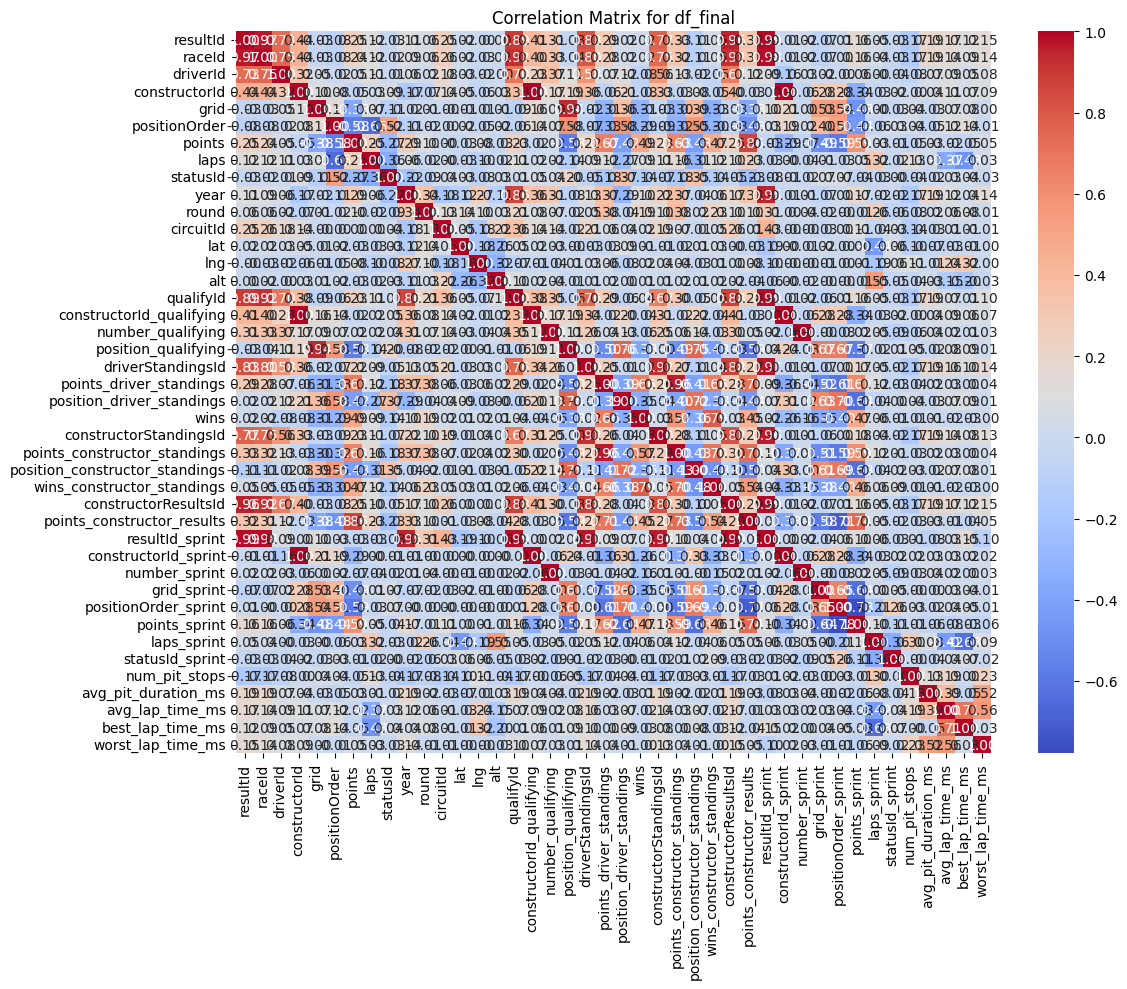

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df_final.select_dtypes(include=['number'])
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix for df_final')
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

correlation_matrix = numeric_df.corr().abs()
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]
reduced_df = numeric_df.drop(columns=to_drop)

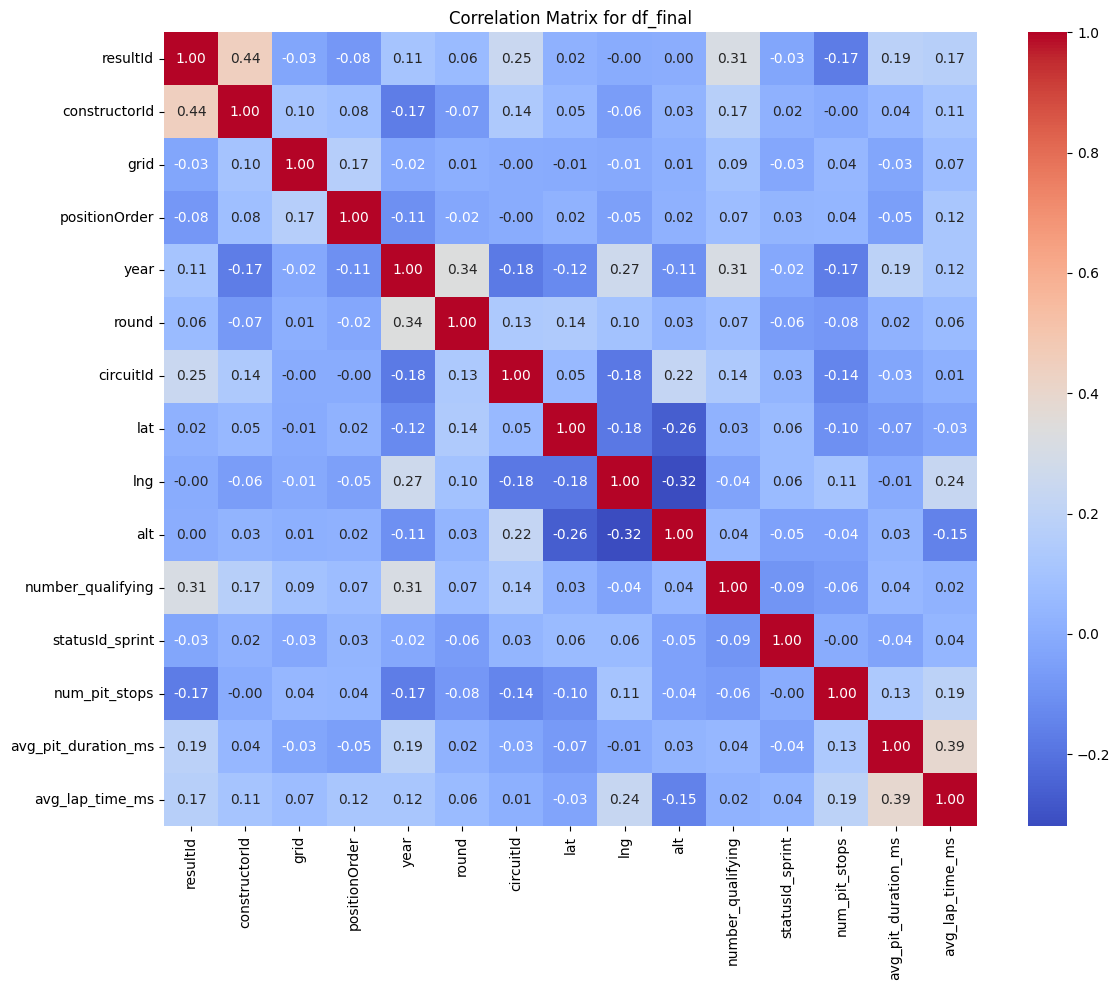

In [ ]:
numeric_df = reduced_df.select_dtypes(include=['number'])
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix for df_final')
plt.tight_layout()
plt.show()

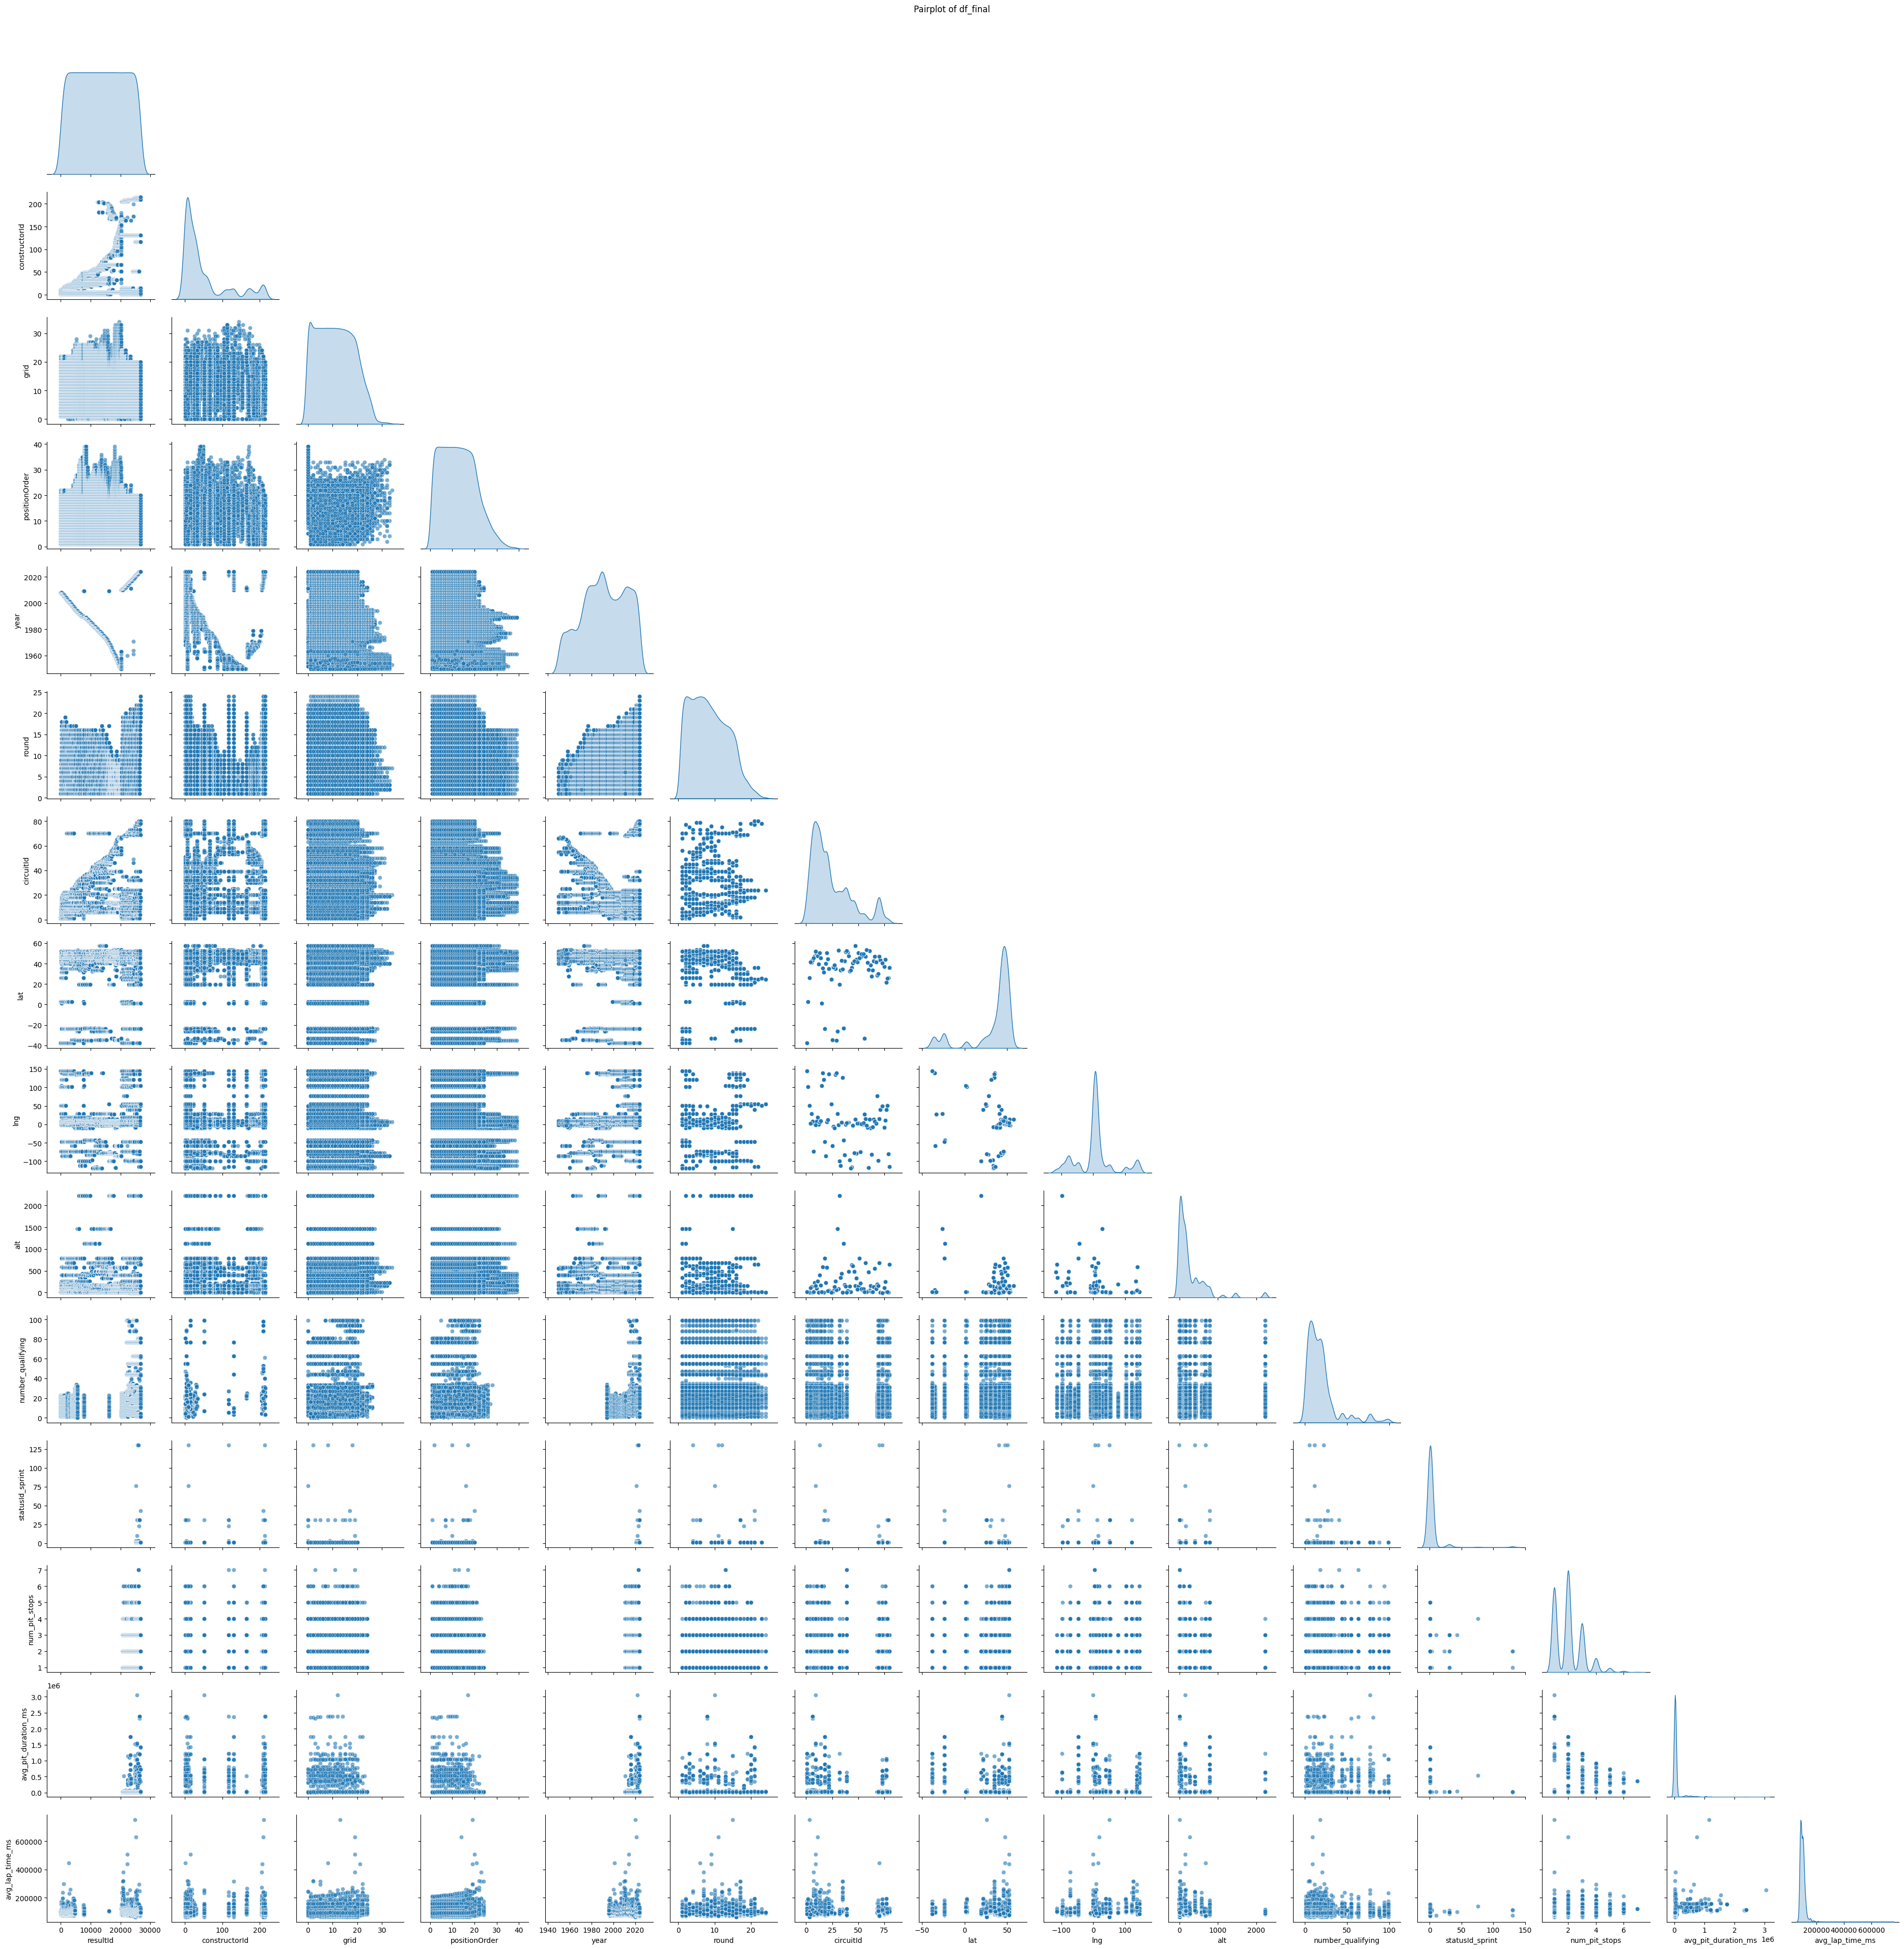

In [ ]:
sns.pairplot(
    reduced_df,
    diag_kind='kde',
    markers='o',
    plot_kws={'alpha': 0.6},
    corner=True
)

plt.suptitle('Pairplot of df_final', y=1.02)
plt.tight_layout()
plt.show()

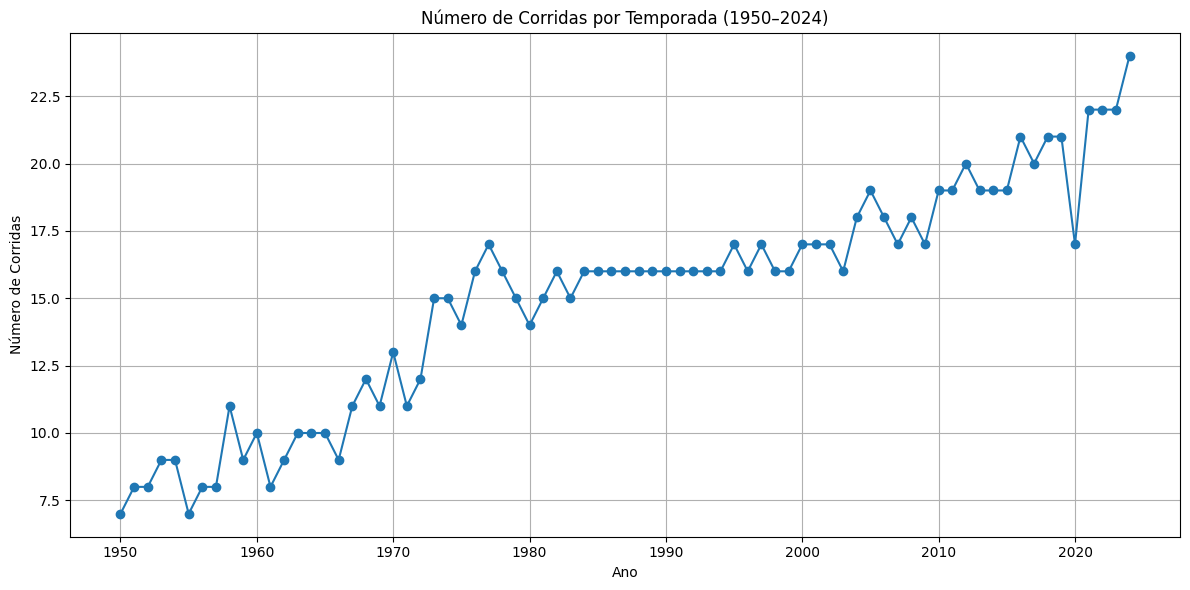

In [ ]:
import matplotlib.pyplot as plt

corridas_por_ano = df_final.groupby('year')['raceId'].nunique()

plt.figure(figsize=(12, 6))
plt.plot(corridas_por_ano.index, corridas_por_ano.values, marker='o')
plt.title("Número de Corridas por Temporada (1950–2024)")
plt.xlabel("Ano")
plt.ylabel("Número de Corridas")
plt.grid(True)
plt.tight_layout()
plt.show()


- Treino do Modelo

In [ ]:
def tempo_str_para_ms(tempo_str):
    try:
        if pd.isna(tempo_str):
            return None
        minutos, segundos = tempo_str.split(":")
        total_ms = int(minutos) * 60 * 1000 + float(segundos) * 1000
        return int(total_ms)
    except:
        return None

for col in ['q1', 'q2', 'q3']:
    df_final[col] = df_final[col].apply(tempo_str_para_ms)


In [ ]:
df_final[['q1', 'q2', 'q3']] = df_final[['q1', 'q2', 'q3']].fillna(999999)

In [ ]:
# Train and test split
from sklearn.model_selection import train_test_split

features = [
    'grid',  
    'year', 'round',
    'avg_lap_time_ms', 'num_pit_stops',  
    'q1', 'q2', 'q3',  
    'points_driver_standings',  
    'position_driver_standings',
    'points_constructor_standings',
    'position_constructor_standings'
]

X = df_final[features]
y = df_final['positionOrder']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

imputer = SimpleImputer(strategy='constant', fill_value=999999)
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train_imputed, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,                    
    scoring='accuracy',     
    n_jobs=-1               
)


grid_search.fit(X_train_imputed, y_train)


print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor score (média CV):", grid_search.best_score_)


melhor_modelo = grid_search.best_estimator_

Melhores parâmetros: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Melhor score (média CV): 0.16662750947262603


In [ ]:
#Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = model.predict(X_test_imputed)
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

Acurácia: 0.13004484304932734
Relatório de Classificação:
               precision    recall  f1-score   support

           1       0.48      0.52      0.50       228
           2       0.28      0.43      0.33       221
           3       0.18      0.37      0.24       231
           4       0.11      0.30      0.16       223
           5       1.00      0.06      0.11       211
           6       0.86      0.03      0.05       235
           7       0.10      0.39      0.16       210
           8       0.00      0.00      0.00       257
           9       0.00      0.00      0.00       245
          10       0.00      0.00      0.00       208
          11       0.00      0.00      0.00       218
          12       0.00      0.00      0.00       217
          13       0.11      0.26      0.15       242
          14       0.00      0.00      0.00       250
          15       0.05      0.33      0.08       206
          16       0.00      0.00      0.00       233
          17       0.0

c:\Users\Miguel António\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Miguel António\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Miguel António\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



- Com features disponíveis

In [ ]:
'''from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Features disponíveis ANTES da qualificação e corrida
features_disponiveis = [
    'grid', 'year', 'round',
    'avg_lap_time_ms',
    'points_driver_standings', 'position_driver_standings',
    'points_constructor_standings', 'position_constructor_standings'
]

# Preparar o DataFrame de treino com essas features
df_model_reduzido = df_final[features_disponiveis + ['positionOrder']].copy()
df_model_reduzido = df_model_reduzido.dropna(subset=['positionOrder'])

# Separar X e y
X = df_model_reduzido[features_disponiveis]
y = df_model_reduzido['positionOrder']

# Dividir em treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o imputador apenas com as features disponíveis
imputer_reduzido = SimpleImputer(strategy='constant', fill_value=999999)
X_train_imp = imputer_reduzido.fit_transform(X_train)
X_test_imp = imputer_reduzido.transform(X_test)

# Treinar modelo
modelo_reduzido = DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10, random_state=42)
modelo_reduzido.fit(X_train_imp, y_train)

# Lista dos top 3 pilotos com dados estimados
pilotos = [
    {"forename":"Oscar", "surname":"Piastri", "grid":2, "year":2025, "round":11,
     "avg_lap_time_ms":64442, "points_driver_standings":198, "position_driver_standings":1,
     "points_constructor_standings":374, "position_constructor_standings":1},

    {"forename":"Lando", "surname":"Norris", "grid":1, "year":2025, "round":11,
     "avg_lap_time_ms":64324, "points_driver_standings":176, "position_driver_standings":2,
     "points_constructor_standings":374, "position_constructor_standings":1},

    {"forename":"Max", "surname":"Verstappen", "grid":3, "year":2025, "round":11,
     "avg_lap_time_ms":64534, "points_driver_standings":155, "position_driver_standings":3,
     "points_constructor_standings":162, "position_constructor_standings":4}
]

# Criar DataFrame apenas com as features corretas
input_df = pd.DataFrame([{k: v for k, v in p.items() if k in features_disponiveis} for p in pilotos])

# Garantir ordem das colunas igual à usada no treino
input_df = input_df[features_disponiveis]

# Aplicar imputação
input_imp = imputer_reduzido.transform(input_df)

# Previsões
preds = modelo_reduzido.predict(input_imp)

# Montar resultados com nomes
resultados = []
for p, pos in zip(pilotos, preds):
    nome = f"{p['forename']} {p['surname']}"
    resultados.append((nome, pos))

# Ordenar por posição prevista
resultados_sorted = sorted(resultados, key=lambda x: x[1])

# Exibir previsões
for nome, pos in resultados_sorted:
    print(f"{nome}: P{pos}")
'''

'from sklearn.impute import SimpleImputer\nfrom sklearn.tree import DecisionTreeClassifier\nfrom sklearn.model_selection import train_test_split\nimport pandas as pd\n\n# Features disponíveis ANTES da qualificação e corrida\nfeatures_disponiveis = [\n    \'grid\', \'year\', \'round\',\n    \'avg_lap_time_ms\',\n    \'points_driver_standings\', \'position_driver_standings\',\n    \'points_constructor_standings\', \'position_constructor_standings\'\n]\n\n# Preparar o DataFrame de treino com essas features\ndf_model_reduzido = df_final[features_disponiveis + [\'positionOrder\']].copy()\ndf_model_reduzido = df_model_reduzido.dropna(subset=[\'positionOrder\'])\n\n# Separar X e y\nX = df_model_reduzido[features_disponiveis]\ny = df_model_reduzido[\'positionOrder\']\n\n# Dividir em treino/teste\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Criar e treinar o imputador apenas com as features disponíveis\nimputer_reduzido = SimpleImputer(strategy